In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns

import matplotlib.pyplot as plt   
import matplotlib.style

import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,roc_auc_score,roc_curve

## Problem 1 - Linear Regression

### 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [2]:
# reading the CSV file into pandas dataframe
df1 = pd.read_csv("cubic_zirconia.csv") 

In [3]:
df1.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
df1.shape

(26967, 11)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [6]:
df1.duplicated().sum()

0

In [7]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,26967.0,13484.000000,7784.846691,1.0,6742.50,13484.00,20225.50,26967.00
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [8]:
for column in df1.columns:
    if df1[column].dtype == 'object':
        print(column.upper(),': ',df1[column].nunique())
        print(df1[column].value_counts().sort_values())

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64
COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64
CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64


In [9]:
df1=df1.drop('Unnamed: 0',axis=1)

In [10]:
df1.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [11]:
for column in df1.columns:
    if df1[column].dtype != 'object':
        mean = df1[column].mean()
        df1[column] = df1[column].fillna(mean)    
        
df1.isnull().sum() 

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [12]:
dup = df1.duplicated()
print('Number of duplicate rows = %d' % (dup.sum()))

Number of duplicate rows = 34


In [13]:
print('Before',df1.shape)
df1.drop_duplicates(inplace=True) 
print('After',df1.shape)

Before (26967, 10)
After (26933, 10)


In [14]:
df1.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [15]:
df1.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [16]:
for feature in df1.columns: 
    if df1[feature].dtype == 'object':
        df1[feature] = pd.Categorical(df1[feature]).codes    

In [17]:
df1.dtypes

carat      float64
cut           int8
color         int8
clarity       int8
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

### Univariate analysis

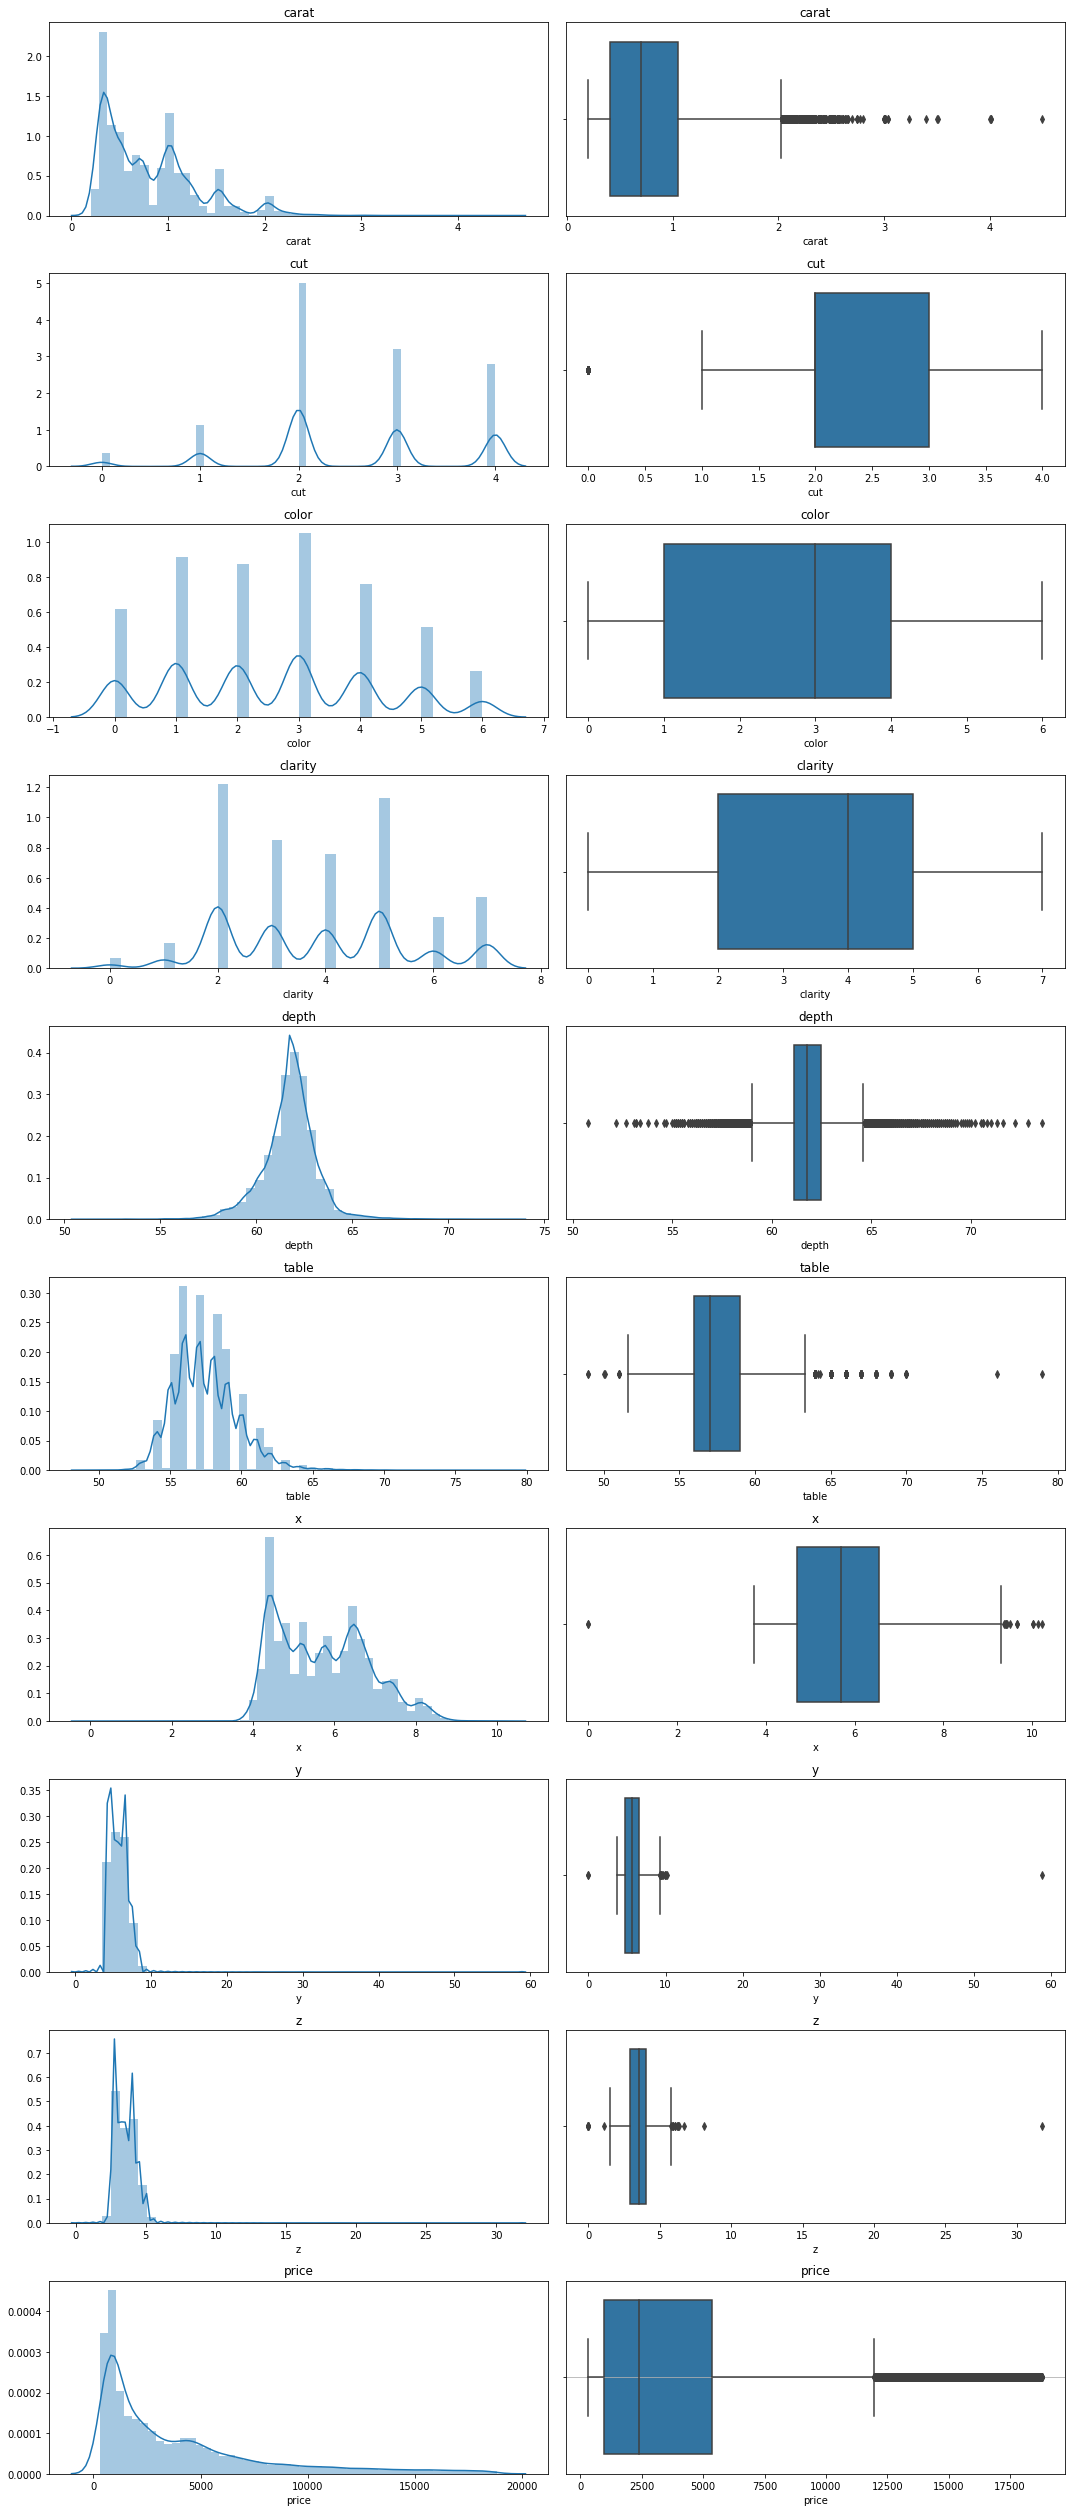

In [18]:
fig, axes = plt.subplots(nrows = 10, ncols = 2)
fig.set_size_inches(15, 35)

continuous = df1.dtypes[ (df1.dtypes == 'int64')|(df1.dtypes == 'float64')|(df1.dtypes == 'int8')].index
df2 = df1[continuous]

for i in range(0,len(df2.columns)):
    a = sns.distplot(df2[df2.columns[i]] , ax = axes[i][0])
    a.set_title(df2.columns[i], fontsize = 12)
    a = sns.boxplot(df2[df2.columns[i]] , orient = "h" , ax = axes[i][1])
    a.set_title(df2.columns[i],fontsize = 12)
    plt.grid()

plt.tight_layout()

In [19]:
df1['cut'].value_counts()

2    10805
3     6886
4     6027
1     2435
0      780
Name: cut, dtype: int64

In [20]:
df1['color'].value_counts()

3    5653
1    4916
2    4723
4    4095
0    3341
5    2765
6    1440
Name: color, dtype: int64

In [21]:
df1['clarity'].value_counts()

2    6565
5    6093
3    4564
4    4087
7    2530
6    1839
1     891
0     364
Name: clarity, dtype: int64

### Bivariate

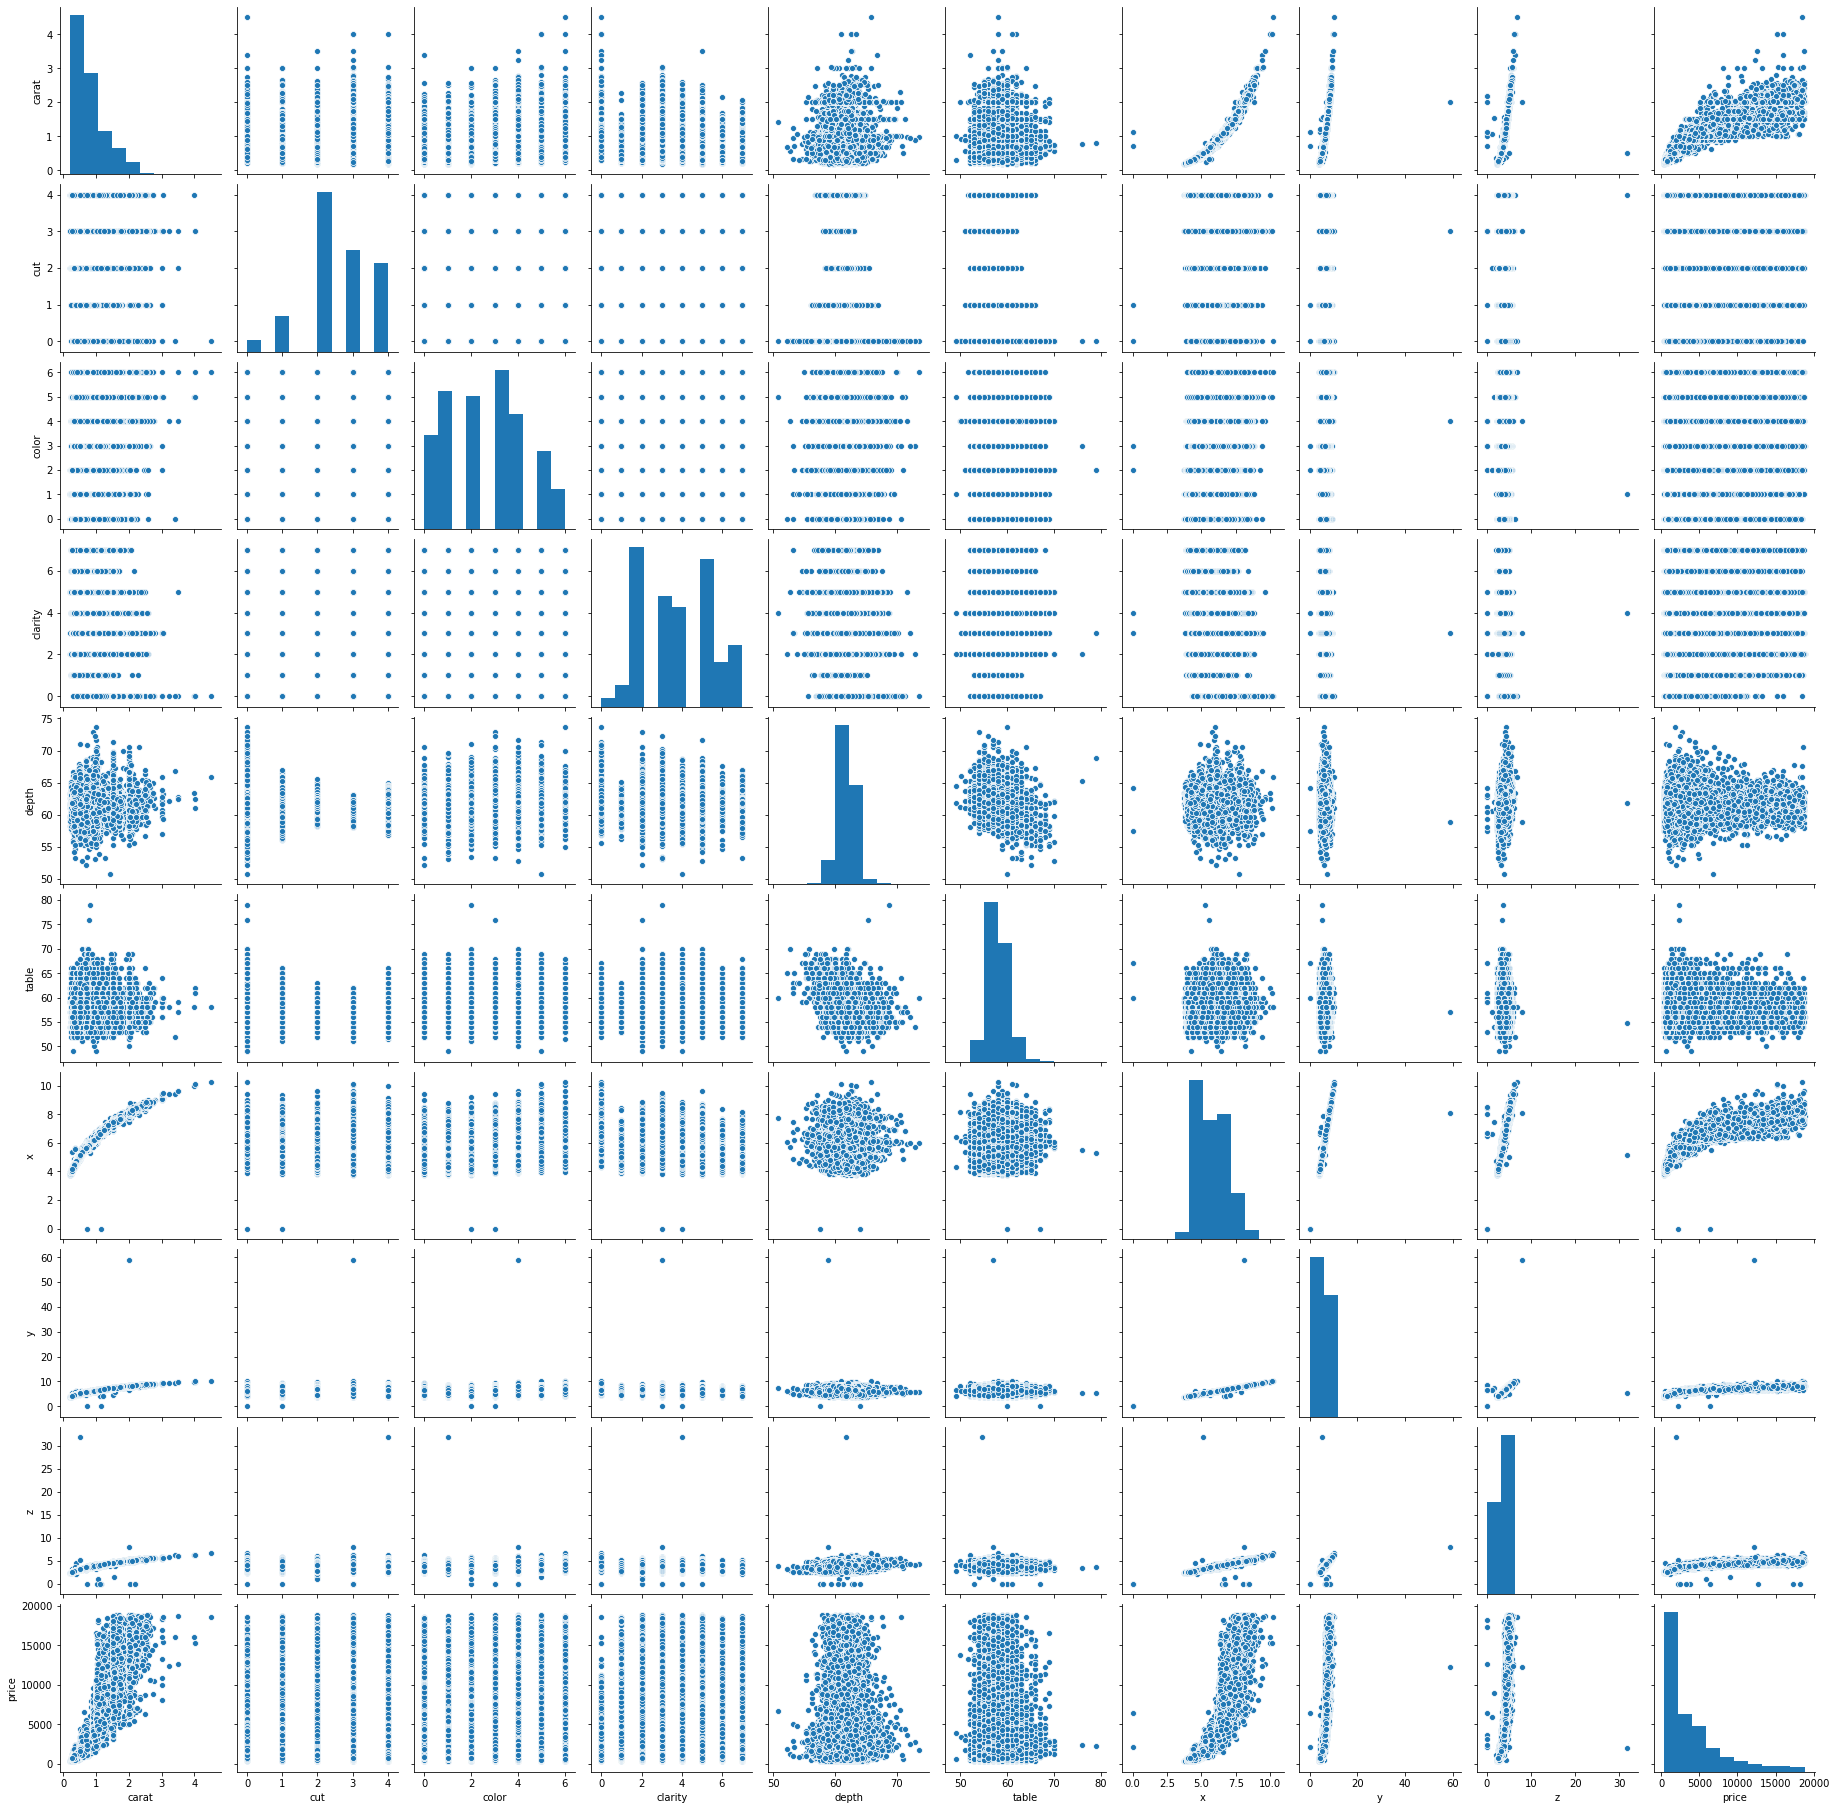

In [22]:
sns.pairplot(df1)
plt.show()

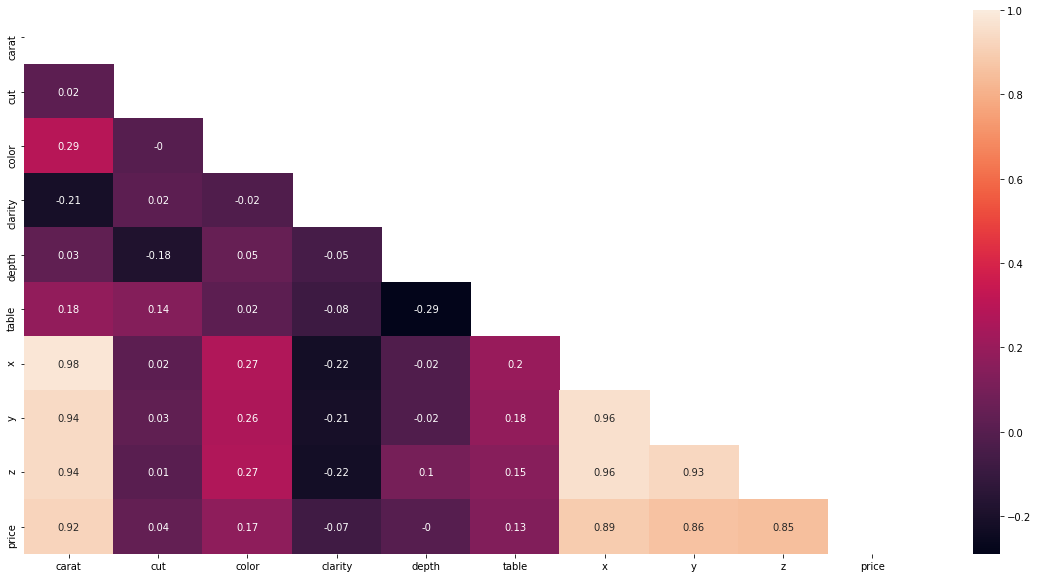

In [23]:
corr = df1.corr()

fig_dims = (20, 10)
fig = plt.subplots(figsize = fig_dims)

mask = np.triu(np.ones_like(corr, dtype = np.bool)) 
sns.heatmap(round(corr,2), annot = True, mask = mask)

plt.show()

### Multivariate

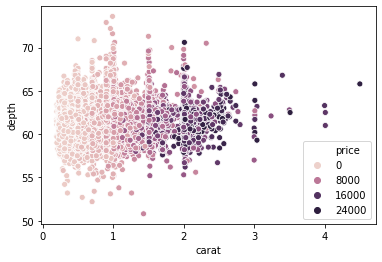

In [24]:
sns.scatterplot(x = 'carat', y = 'depth',hue = 'price', data = df1)
plt.show()

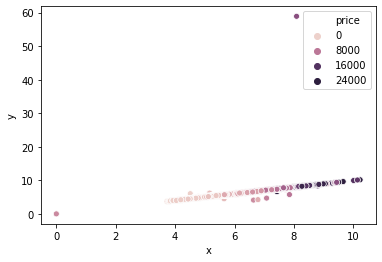

In [25]:
sns.scatterplot(x = 'x', y = 'y', hue='price', data = df1,ci = None)
plt.show()

### 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case?

In [26]:
df1.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [27]:
for column in df1.columns:
    if df1[column].dtype != 'object':
        mean = df1[column].mean()
        df1[column] = df1[column].fillna(mean)    
        
df1.isnull().sum() 

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [28]:
dup = df1.duplicated()
print('Number of duplicate rows = %d' % (dup.sum()))

Number of duplicate rows = 0


In [29]:
print('Before',df1.shape)
df1.drop_duplicates(inplace=True) 
print('After',df1.shape)

Before (26933, 10)
After (26933, 10)


- The "zero" values indicates the length, width and height of zirconia in millimeter.
- Other parameters such as price and carrot are associated with the zero values.
- Hence scaling is not to be done as the attributes are in dimnesions which do not need to be standardized.

### 1.3 Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE.

In [30]:
X = StandardScaler()

In [31]:
scaled_df1 = X.fit_transform(df1)

In [32]:
scaled_df1 = pd.DataFrame(scaled_df1, index = df1.index, columns = df1.columns)
scaled_df1.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,-1.043547,-0.541748,-0.940999,-1.063351,0.254493,0.243737,-1.294498,-1.238697,-1.219208,-0.854828
1,-0.980684,0.434559,0.231435,-1.643046,-0.678194,0.243737,-1.161442,-1.092777,-1.163648,-0.734256
2,0.213713,1.410866,-0.940999,1.835122,0.326238,1.139749,0.275562,0.332097,0.336455,0.584584
3,-0.792095,-0.541748,-0.354782,0.096038,-0.104232,-0.652274,-0.806626,-0.800935,-0.802512,-0.709892
4,-1.022593,-0.541748,-0.354782,1.255428,-0.965174,0.691743,-1.223534,-1.118527,-1.233097,-0.785219


In [33]:
X = scaled_df1.iloc[:,0:9]
Y = scaled_df1['price']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30 , random_state = 25)

In [36]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [37]:
traindf1 = pd.concat([X_train, y_train], axis = 1)
testdf1 = pd.concat([X_test,y_test],axis = 1)

In [38]:
traindf1.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [39]:
expr= 'price ~ carat + cut + color + clarity + depth + table + x + y + z'

In [40]:
import statsmodels.formula.api as smf
lm = smf.ols(formula = expr, data = traindf1).fit()
lm.params

Intercept    0.001432
carat        1.294935
cut          0.011243
color       -0.115210
clarity      0.124223
depth       -0.051908
table       -0.046864
x           -0.788456
y            0.513132
z           -0.014394
dtype: float64

In [41]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                 1.618e+04
Date:                Wed, 30 Jun 2021   Prob (F-statistic):               0.00
Time:                        17:48:13   Log-Likelihood:                -6352.3
No. Observations:               18853   AIC:                         1.272e+04
Df Residuals:                   18843   BIC:                         1.280e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0014      0.002      0.580      0.5

In [42]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [43]:
reg.score(X_train, y_train)

0.8854038589924862

In [44]:
reg.score(X_test, y_test)

0.8294698627154848

In [45]:
pred_traindf1 = reg.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,pred_traindf1))

0.338916610866983

In [46]:
pred_testdf1 = reg.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,pred_testdf1))

0.4118232692058547

In [47]:
lm = smf.ols(formula = expr, data = traindf1).fit()
lm.params

Intercept    0.001432
carat        1.294935
cut          0.011243
color       -0.115210
clarity      0.124223
depth       -0.051908
table       -0.046864
x           -0.788456
y            0.513132
z           -0.014394
dtype: float64

In [48]:
for i,j in np.array(lm.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i), end = ' ')

(0.0) * Intercept + (1.29) * carat + (0.01) * cut + (-0.12) * color + (0.12) * clarity + (-0.05) * depth + (-0.05) * table + (-0.79) * x + (0.51) * y + (-0.01) * z + 

In [49]:
y_pred = lm.predict(testdf1)

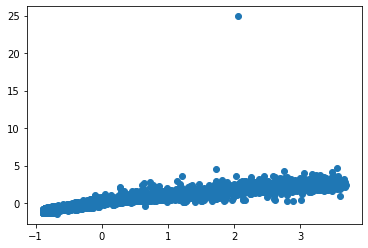

In [50]:
plt.scatter(y_test, y_pred)
plt.show()

### 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.

1. Classifying the stones based on quality cut, color and clarity is not seeming to help the company. 

2. Focussing on creating stones of cubic zirconia with higher carat weight(avg weight of more than 2 carats) for a higher profit margin.

3. Less profitable stones should be of less than average size of 5mm in length, width and breadth of the stone so girdle diameter will reduce. This has an impact on the weight of the cubic zirconia stone. 

4. Price depends more on the carat, length, width and height of the stone more than anything else.
(carat > length > width > height)

## Problem 2 Logistic Regression and LDA

### 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [51]:
dfh1 = pd.read_csv("Holiday_Package.csv") 

In [52]:
dfh1.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [53]:
dfh1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [54]:
dfh1.shape

(872, 8)

In [55]:
dfh1 = dfh1.drop('Unnamed: 0', axis = 1)

In [56]:
dfh1.duplicated().sum()

0

In [57]:
dfh1.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [58]:
dfh1.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,872.0,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0


In [59]:
for column in dfh1.columns:
    if dfh1[column].dtype == 'object':
        print(column.upper(),': ',dfh1[column].nunique())
        print(dfh1[column].value_counts().sort_values())

HOLLIDAY_PACKAGE :  2
yes    401
no     471
Name: Holliday_Package, dtype: int64
FOREIGN :  2
yes    216
no     656
Name: foreign, dtype: int64


In [60]:
for feature in dfh1.columns: 
    if dfh1[feature].dtype == 'object':
        dfh1[feature] = pd.Categorical(dfh1[feature]).codes   

In [61]:
dfh1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Holliday_Package   872 non-null    int8 
 1   Salary             872 non-null    int64
 2   age                872 non-null    int64
 3   educ               872 non-null    int64
 4   no_young_children  872 non-null    int64
 5   no_older_children  872 non-null    int64
 6   foreign            872 non-null    int8 
dtypes: int64(5), int8(2)
memory usage: 35.9 KB


In [62]:
dfh1.describe().T

,count,mean,std,min,25%,50%,75%,max
Holliday_Package,872.0,0.459862,0.498672,0.0,0.0,0.0,1.0,1.0
Salary,872.0,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0
foreign,872.0,0.247706,0.431928,0.0,0.0,0.0,0.0,1.0


### Univariate Analysis

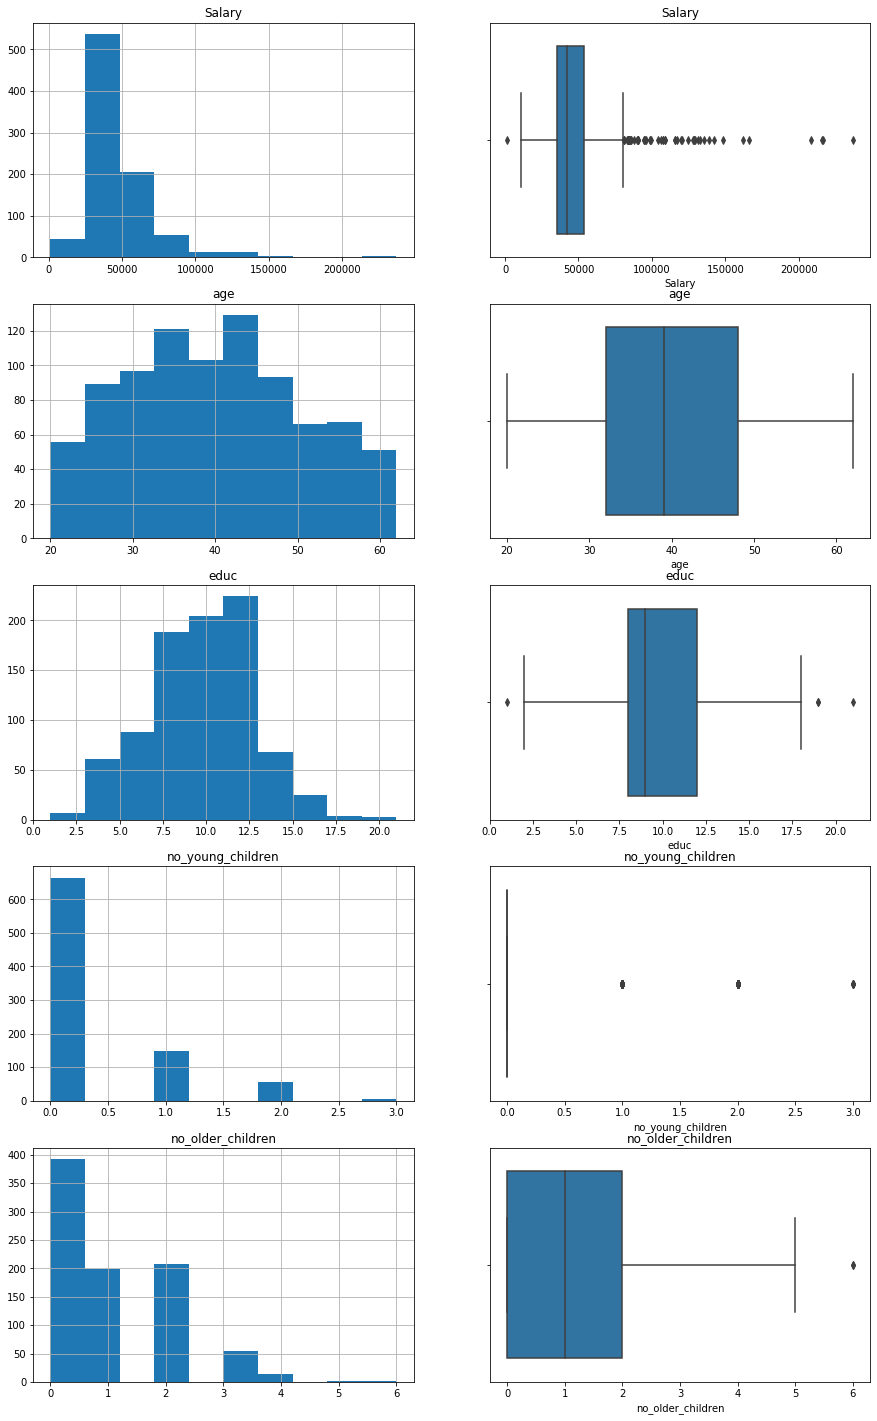

In [63]:
fig, axes = plt.subplots(nrows = 5,ncols = 2)
fig.set_size_inches(15, 25)

continuous = dfh1.dtypes[ (dfh1.dtypes == 'int64')|(dfh1.dtypes == 'float64')].index
dfh2 = dfh1[continuous]

for i in range(0,len(dfh2.columns)):
    a = dfh2[dfh2.columns[i]].hist(ax = axes[i][0]) 
    a.set_title(dfh2.columns[i],fontsize = 12)
    a = sns.boxplot(dfh2[dfh2.columns[i]] , orient = "h" , ax = axes[i][1])
    a.set_title(dfh2.columns[i],fontsize = 12)

plt.show()

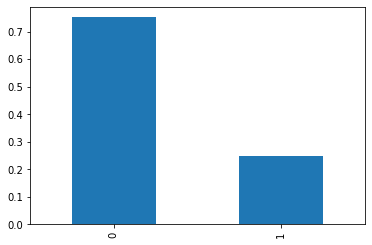

In [64]:
dfh1['foreign'].value_counts(normalize=True).plot(kind = 'bar')
plt.show()

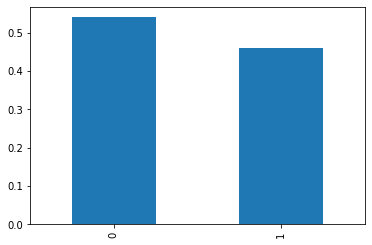

In [65]:
dfh1['Holliday_Package'].value_counts(normalize = True).plot(kind = 'bar')
plt.show()

### Bivariate

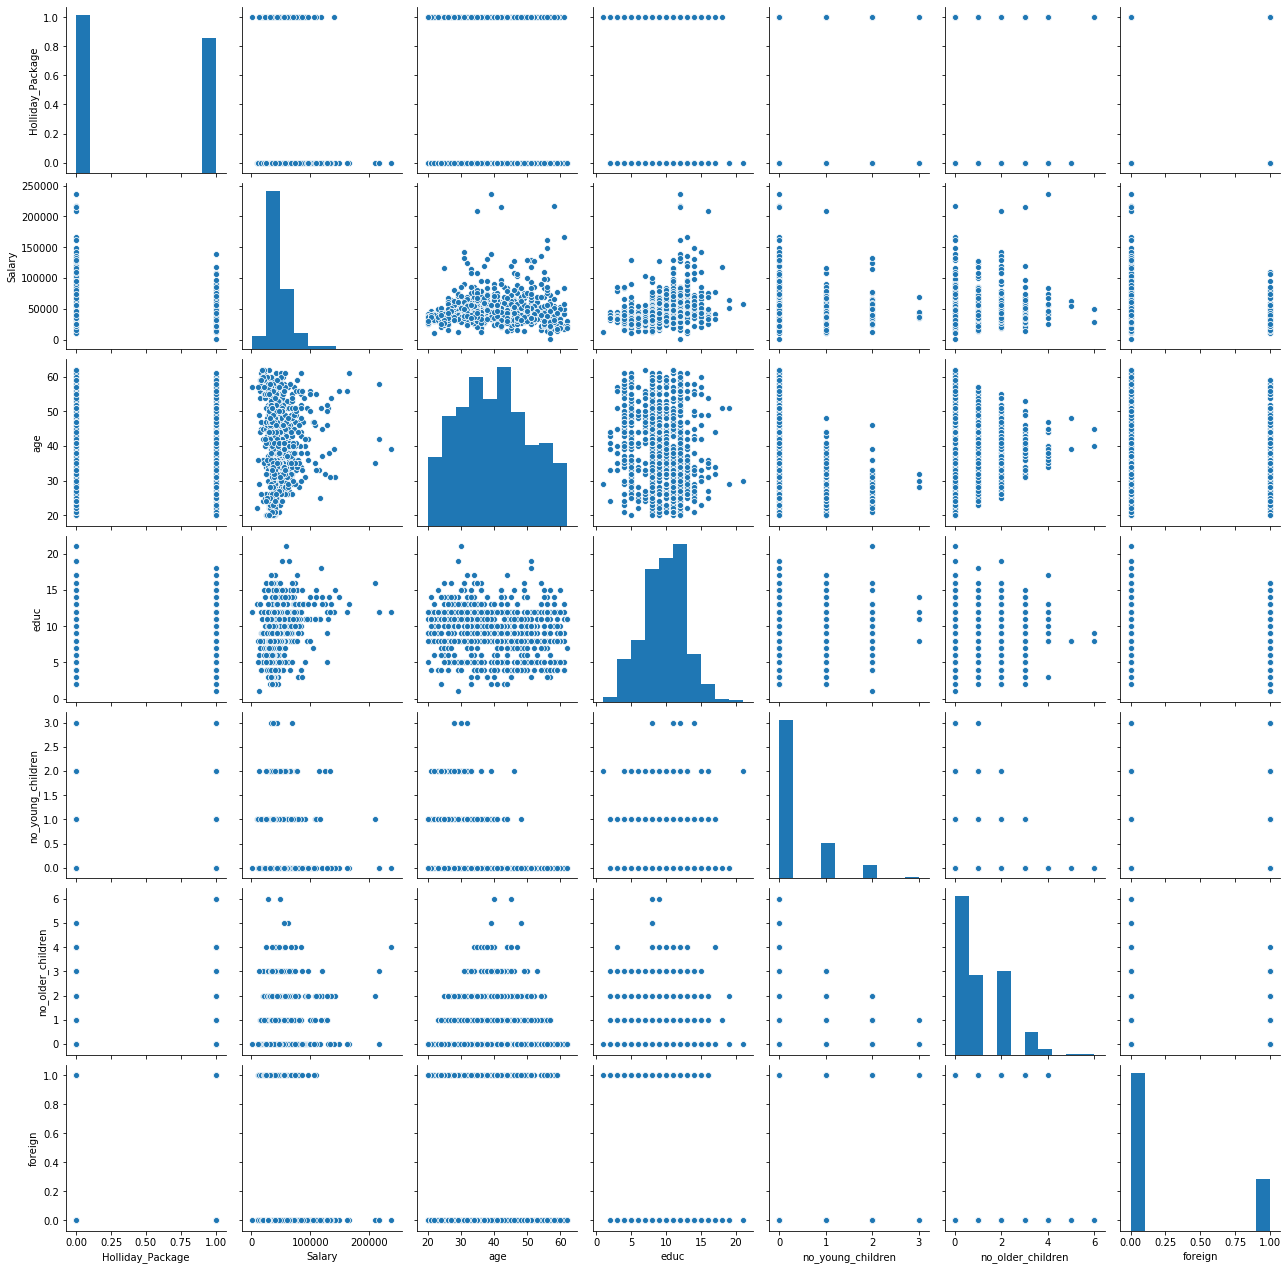

In [66]:
sns.pairplot(dfh1)
plt.show()

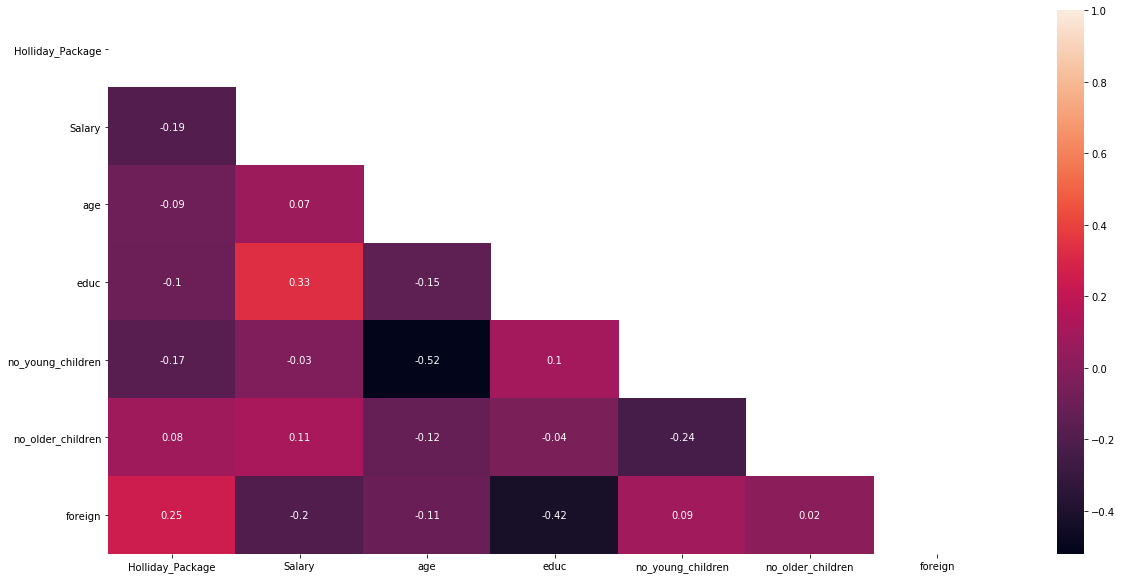

In [67]:
corr = dfh1.corr()

fig_dims = (20, 10)
fig = plt.subplots(figsize = fig_dims)

mask = np.triu(np.ones_like(corr, dtype = np.bool)) 
sns.heatmap(round(corr,2), annot=True, mask = mask)

plt.show()

### Multivariate

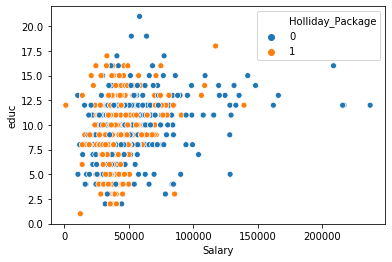

In [68]:
sns.scatterplot(x = 'Salary', y = 'educ', hue = 'Holliday_Package', data = dfh1)
plt.show()

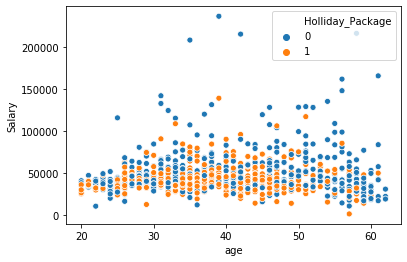

In [69]:
sns.scatterplot(x = 'age', y = 'Salary', hue = 'Holliday_Package', data = dfh1)
plt.show()

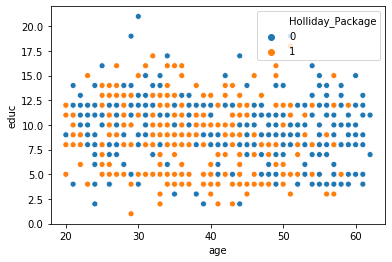

In [70]:
sns.scatterplot(x = 'age', y = 'educ', hue = 'Holliday_Package', data = dfh1)
plt.show()

### 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X = dfh1.drop("Holliday_Package", axis = 1)
X

,Salary,age,educ,no_young_children,no_older_children,foreign
0,48412,30,8,1,1,0
1,37207,45,8,0,1,0
2,58022,46,9,0,0,0
3,66503,31,11,2,0,0
4,66734,44,12,0,2,0
...,...,...,...,...,...,...
867,40030,24,4,2,1,1
868,32137,48,8,0,0,1
869,25178,24,6,2,0,1
870,55958,41,10,0,1,1


In [73]:
y = dfh1['Holliday_Package']
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Holliday_Package, dtype: int8

In [74]:
dfh1['Holliday_Package'].value_counts()

0    471
1    401
Name: Holliday_Package, dtype: int64

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30 , random_state = 25)

In [76]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (610, 6)
X_test (262, 6)
y_train (610,)
y_test (262,)


In [77]:
print(dfh1.Holliday_Package.value_counts())
print('Holliday_Package 1s (Yes)', 401/872)
print('Holliday_Package 0s (No)', 471/924)

0    471
1    401
Name: Holliday_Package, dtype: int64
Holliday_Package 1s (Yes) 0.4598623853211009
Holliday_Package 0s (No) 0.5097402597402597


In [78]:
lr = LogisticRegression()

param_grid = [
    {
    'solver' : ['liblinear'],
    'penalty' : ['l2','l1, elastcnet, none'],
    'tol' : [0.0001, 0.00001],
    'C' : [0.1, 1, 10],
    'intercept_scaling' : [1.0]
    }                       
    ]

grid_search = GridSearchCV(estimator = lr, param_grid = param_grid, cv = 5,  n_jobs = -1)
grid_search.fit(X_train, y_train.values.ravel())

print(grid_search.best_params_)
lr_best = grid_search.best_estimator_
lr_best

{'C': 1, 'intercept_scaling': 1.0, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 1e-05}


LogisticRegression(C=1, intercept_scaling=1.0, solver='liblinear', tol=1e-05)

In [79]:
lr_best.fit(X_train, y_train.values.ravel())
ytrain_pred = lr_best.predict(X_train)
ytest_pred = lr_best.predict(X_test)

lr_b_score = lr_best.score(X_test, y_test)

print(lr_b_score)
print(metrics.confusion_matrix(y_test, ytest_pred))
print(metrics.classification_report(y_test, ytest_pred))

ytest_pred_prob = lr_best.predict_proba(X_test)
pd.DataFrame(ytest_pred_prob).head()

0.6755725190839694
[[111  34]
 [ 51  66]]
              precision    recall  f1-score   support

           0       0.69      0.77      0.72       145
           1       0.66      0.56      0.61       117

    accuracy                           0.68       262
   macro avg       0.67      0.66      0.67       262
weighted avg       0.67      0.68      0.67       262



,0,1
0,0.235684,0.764316
1,0.649278,0.350722
2,0.500595,0.499405
3,0.513497,0.486503
4,0.454717,0.545283


### 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

In [80]:
lr_best.score(X_train, y_train)

0.6754098360655738

In [81]:
lr_best.score(X_test, y_test) 

0.6755725190839694

In [82]:
confusion_matrix(y_train, ytrain_pred)

array([[254,  72],
       [126, 158]], dtype=int64)

In [83]:
confusion_matrix(y_test, ytest_pred)

array([[111,  34],
       [ 51,  66]], dtype=int64)

In [84]:
print(classification_report(y_train, ytrain_pred))

              precision    recall  f1-score   support

           0       0.67      0.78      0.72       326
           1       0.69      0.56      0.61       284

    accuracy                           0.68       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.68      0.67       610



In [85]:
print(classification_report(y_test, ytest_pred))

              precision    recall  f1-score   support

           0       0.69      0.77      0.72       145
           1       0.66      0.56      0.61       117

    accuracy                           0.68       262
   macro avg       0.67      0.66      0.67       262
weighted avg       0.67      0.68      0.67       262



AUC: 0.724


Text(0.5, 1.0, 'ROC Curve for Training data - Logistic Regression')

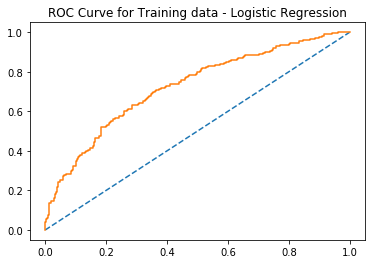

In [86]:
# AUC for the training data
# predict probabilities
probability = lr_best.predict_proba(X_train)

# keep probabilities for the positive outcome only
probability = probability[:, 1]

# calculate AUC
lr_train_auc = roc_auc_score(y_train, probability)
print('AUC: %.3f' % lr_train_auc)

# calculate roc curve
lr_train_fpr, lr_train_tpr, lr_train_thresholds = roc_curve(y_train, probability)
plt.plot([0, 1], [0, 1], linestyle = '--')

# plot the roc curve for the model
plt.plot(lr_train_fpr, lr_train_tpr)
plt.title("ROC Curve for Training data - Logistic Regression")

AUC: 0.728


Text(0.5, 1.0, 'ROC Curve for Test Data - Logistic Regression')

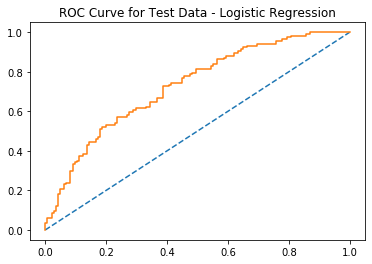

In [87]:
# AUC for the testing data
# predict probabilities
probability = lr_best.predict_proba(X_test)

# keep probabilities for the positive outcome only
probability = probability[:, 1]

# calculate AUC
lr_test_auc = roc_auc_score(y_test, probability)
print('AUC: %.3f' % lr_test_auc)

# calculate roc curve
lr_test_fpr, lr_test_tpr, lr_test_thresholds = roc_curve(y_test, probability)
plt.plot([0, 1], [0, 1], linestyle = '--')

# plot the roc curve for the model
plt.plot(lr_test_fpr, lr_test_tpr)
plt.title("ROC Curve for Test Data - Logistic Regression")

In [88]:
#Linear discriminant analysis

from numpy import arange
lda = LinearDiscriminantAnalysis()
grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']
grid['shrinkage'] = arange(0, 1, 0.01)

cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 25)
print("cv: ", cv)

search = GridSearchCV(lda, grid, scoring = 'accuracy', cv = cv, n_jobs = -1)
# perform the search

search.fit(X_train, y_train.values.ravel())
print(search.best_params_)
print(search.best_score_)
lda_best = search.best_estimator_
lda_best

cv:  RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=25)
{'shrinkage': 0.0, 'solver': 'lsqr'}
0.6617486338797814


LinearDiscriminantAnalysis(shrinkage=0.0, solver='lsqr')

In [89]:
lda_best.fit(X_train, y_train.values.ravel())
ytrain_pred_lda = lda_best.predict(X_train)
ytest_pred_lda = lda_best.predict(X_test)

score_lda = lda_best.score(X_test, y_test)
print(score_lda)
print(metrics.confusion_matrix(y_test, ytest_pred_lda ))
print(metrics.classification_report(y_test, ytest_pred_lda ))
ytest_pred_lda_prob = lda_best.predict_proba(X_test)

pd.DataFrame(ytest_pred_lda_prob).head()

0.6603053435114504
[[107  38]
 [ 51  66]]
              precision    recall  f1-score   support

           0       0.68      0.74      0.71       145
           1       0.63      0.56      0.60       117

    accuracy                           0.66       262
   macro avg       0.66      0.65      0.65       262
weighted avg       0.66      0.66      0.66       262



,0,1
0,0.236144,0.763856
1,0.625445,0.374555
2,0.510339,0.489661
3,0.522480,0.477520
4,0.405858,0.594142


In [90]:
lda_best.score(X_train,y_train) 

0.6688524590163935

In [91]:
lda_best.score(X_test,y_test) 

0.6603053435114504

In [92]:
confusion_matrix(y_train, ytrain_pred_lda)

array([[249,  77],
       [125, 159]], dtype=int64)

In [93]:
confusion_matrix(y_test, ytest_pred_lda)

array([[107,  38],
       [ 51,  66]], dtype=int64)

In [94]:
print(classification_report(y_train, ytrain_pred_lda))

              precision    recall  f1-score   support

           0       0.67      0.76      0.71       326
           1       0.67      0.56      0.61       284

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610



In [95]:
print(classification_report(y_test, ytest_pred_lda))

              precision    recall  f1-score   support

           0       0.68      0.74      0.71       145
           1       0.63      0.56      0.60       117

    accuracy                           0.66       262
   macro avg       0.66      0.65      0.65       262
weighted avg       0.66      0.66      0.66       262



AUC: 0.725


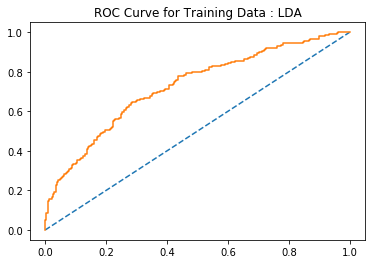

In [96]:
# AUC for the training data
# predict probabilities
probability = lda_best.predict_proba(X_train)

# keep probabilities for the positive outcome only
probability = probability[:, 1]

# calculate AUC
lr_train_auc = roc_auc_score(y_train, probability)
print('AUC: %.3f' % lr_train_auc)

# calculate roc curve
lr_train_fpr, lr_train_tpr, lr_train_threshold = roc_curve(y_train, probability)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(lr_train_fpr, lr_train_tpr)
plt.title("ROC Curve for Training Data : LDA")
plt.show()

AUC: 0.748


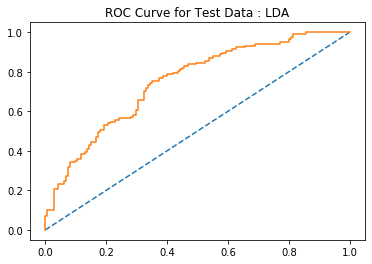

In [97]:
# AUC for the testing data
# predict probabilities
probability = lda_best.predict_proba(X_test)

# keep probabilities for the positive outcome only
probability = probability[:, 1]

# calculate AUC
lr_test_auc = roc_auc_score(y_test, probability)
print('AUC: %.3f' % lr_test_auc)

# calculate roc curve
lr_test_fpr, lr_test_tpr, lr_test_threshold = roc_curve(y_test, probability)
plt.plot([0, 1], [0, 1], linestyle = '--')

# plot the roc curve for the model
plt.plot(lr_test_fpr, lr_test_tpr)
plt.title("ROC Curve for Test Data : LDA")
plt.show()

### 2.4 Inference: Basis on these predictions, what are the insights and recommendations.

Both models have a very similar accuracy. Linear Discriminant Analysis has a slightly better AUC Score than Logistic Regression. Hence we will choose Linear Discriminant Analysis.

1. Employees with a salary of less than 50000-55000 choose the holiday package. This makes sense as people with less money to spend will want the better deal/package.

2. The increase in salary directly reduces the probability of the employee choosing the holiday package. We can observe this as there is a drastic decline in the number of employees opting for the holiday package post the salary range of 55000.

3. Customers above the age of 40-45 tend to not opt for holiday package. 

4. The tour and travel agency should try to target employees with the following profile. Salary range : 50k to 55k, Age : Less than 45